## ***Capstone Project***

<div style="text-align: center;">
<img src="https://www.freepnglogos.com/uploads/walmart-logo-6.png" alt="Walmart Logo" width="450px" />
<font size="+3" color="#FFA500" style="margin-left: 20px;"><b>Sales Forecasting</b></font>
</div>


*Problem Statement 1:*
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.
Dataset Information:
-The walmart.csv contains 6435 rows and 8 columns.
|Feature     |  Name Description|
|------------|------------------|
|-Store      |    Store number|
|-Date       |    Week of Sales|
|-Weekly_Sales|   Sales for the given store in that week|
|-Holiday_Flag|   If it is a holiday week|
|-Temperature |   Temperature on the day of the sale|
|-Fuel_Price  |  Cost of the fuel in the region|
|-CPI Consumer|   Price Index|
|-Unemployment|   Unemployment Rate|


>1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:

In [334]:
#Importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
import warnings 
warnings.filterwarnings('ignore')


In [335]:
#Loading the dataset.
walmart=pd.read_csv("Walmart DataSet.csv")

In [336]:
#Getting an overview of the data.
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [337]:
#Checking the information of the data.
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [338]:
#Checking if there is any null or missing values present in the data.

walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [339]:
#Checking if there is any duplicate row present in the data.
walmart[walmart.duplicated()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [340]:
pd.set_option('display.float_format','{:.2f}'.format)  #to display the full numbers without scientific notations(exponential format)

walmart.describe()  #to check the statistical description of the data.

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [341]:
#Converting the format of "Date" column to DateTime format.
walmart["Date"]=pd.to_datetime(walmart['Date'],dayfirst=True)

In [342]:
walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11
5,1,2010-03-12,1439541.59,0,57.79,2.67,211.38,8.11
6,1,2010-03-19,1472515.79,0,54.58,2.72,211.22,8.11
7,1,2010-03-26,1404429.92,0,51.45,2.73,211.02,8.11
8,1,2010-04-02,1594968.28,0,62.27,2.72,210.82,7.81
9,1,2010-04-09,1545418.53,0,65.86,2.77,210.62,7.81


In [343]:
walmart.info() # checking if Date is coneverted to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


>**a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?**


In [344]:
#This is one approach of checking correlation of each store with Weekly sales & Unemployment.

# for i in walmart.Store.unique():
#     store_data=(walmart[walmart["Store"]==i])
#     correlation_matrix=store_data[["Weekly_Sales","Unemployment"]].corr()
#     print(f"Store {i} correlation matrix")
#     print(correlation_matrix)

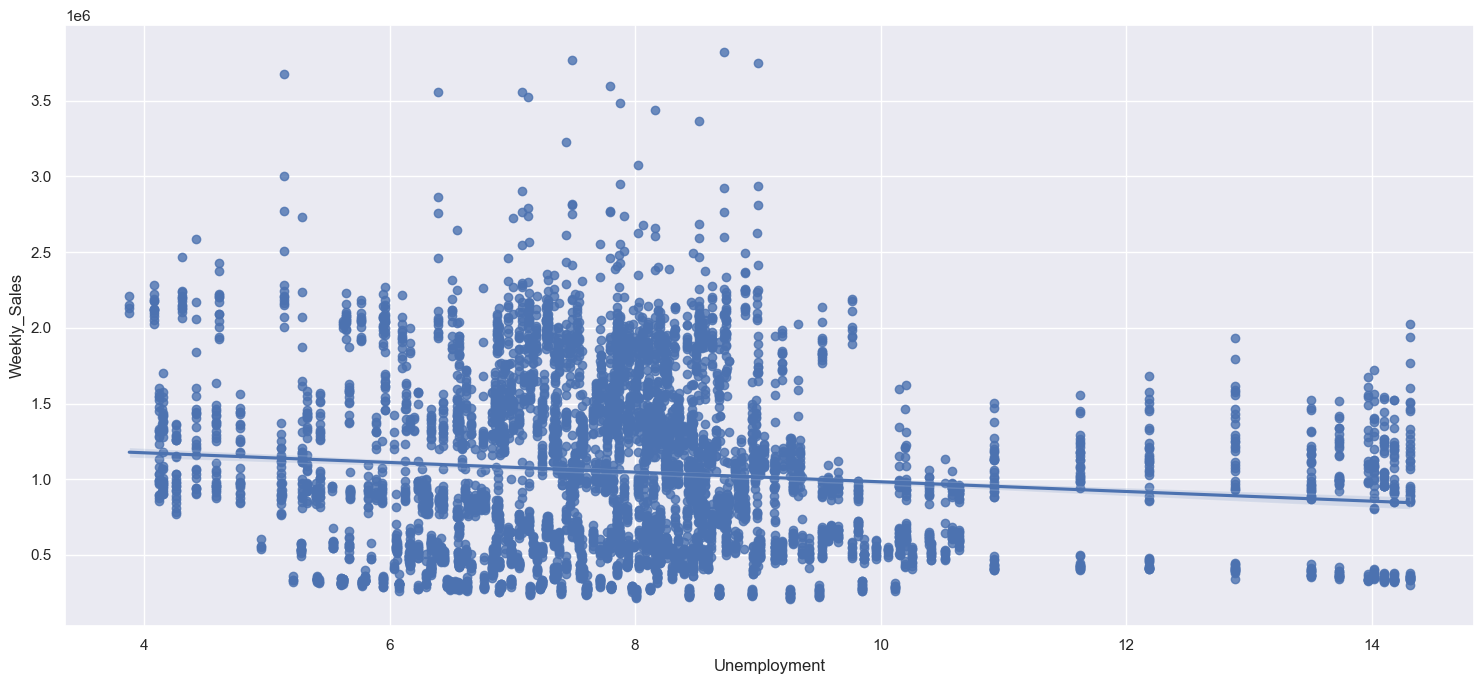

In [345]:
#Creating a regression plot to check the linear realationship between Weekly sales & Unemployment of all stores.
plt.figure(figsize=(15,7))
sns.regplot(y=walmart["Weekly_Sales"],x=walmart["Unemployment"],data=walmart)
plt.tight_layout()
plt.show()

*From the above plot we can see that, as the unemployment rate rises, the Weekly sales are gradually decreasing over time.*

In [346]:
#Checking the correlation of each store with Weekly sales & Unemployment.

store_correlation=walmart.groupby("Store")[["Weekly_Sales","Unemployment"]].corr().iloc[0::2,-1]
store_correlation=pd.DataFrame(store_correlation)
store_correlation.head()

,,Unemployment
Store,,
1,Weekly_Sales,-0.10
2,Weekly_Sales,0.07
3,Weekly_Sales,-0.23
4,Weekly_Sales,-0.34
5,Weekly_Sales,-0.21


In [347]:
#Selecting the stores whose weekly sales are affected the most with increase in unemployment rate.

most_affected_stores=store_correlation[(store_correlation["Unemployment"]<-0.60)]
most_affected_stores

,,Unemployment
Store,,
38,Weekly_Sales,-0.79
44,Weekly_Sales,-0.78


*Since the correlation between "Unemployment and "Weekly Sales" of store 4 and store 44 are having values less than   -0.60, it represents a strong negative correlation or inverse relationship between the variables.It suggests that, these stores might be more sensitive or vulnerable to changes in the unemployment rate compared to others,impacting their sales negatively.*

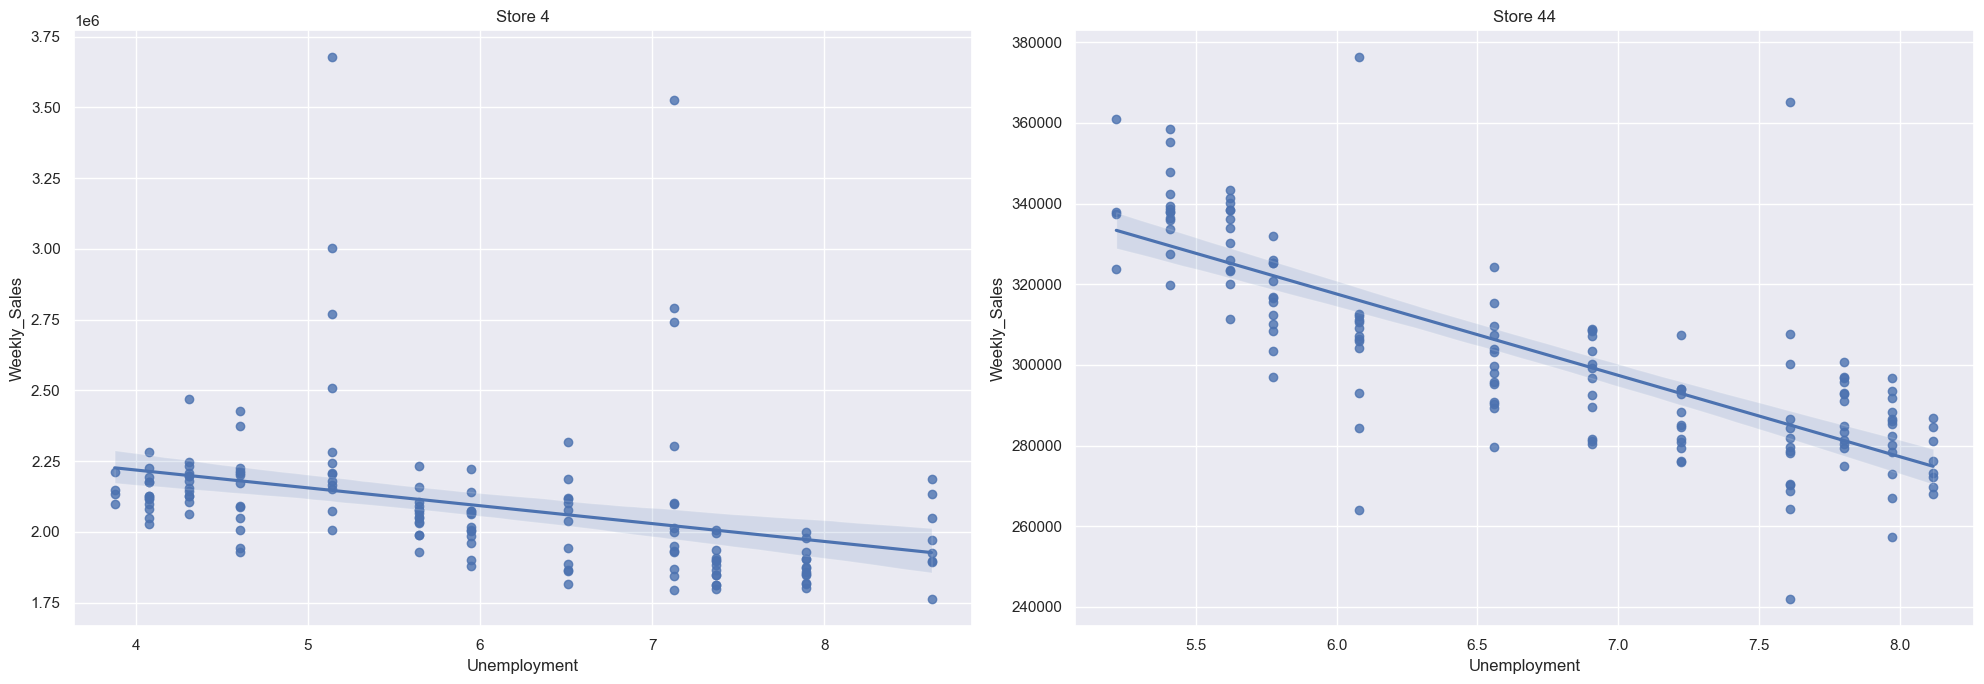

In [348]:
#To understand the affect of unemployment rate on store 4 nad store 4, we have plotted a regression plot of these two stores.

store_4=walmart[walmart["Store"]==4]
store_44=walmart[walmart["Store"]==44]
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.regplot(x=store_4.Unemployment,y=store_4.Weekly_Sales,data=store_4)
plt.title("Store 4")
plt.subplot(1,2,2)
sns.regplot(x=store_44.Unemployment,y=store_44.Weekly_Sales,data=store_44)
plt.title("Store 44")
plt.tight_layout()
plt.show()

*The above graph will help us understand visually how weekly sales are going down consistently with the rise in unemployment rate,representing a consistent inverse relationship between them.*

>**b. If the weekly sales show a seasonal trend, when and what could be the reason?**


In [349]:
#Extracting the date and weekly sales column in a variable named "seasonal_trend"
seasonal_trend=walmart.iloc[:,[1,2]]

In [350]:
#Setting Date as index.
seasonal_trend.set_index("Date",inplace=True)
seasonal_trend.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


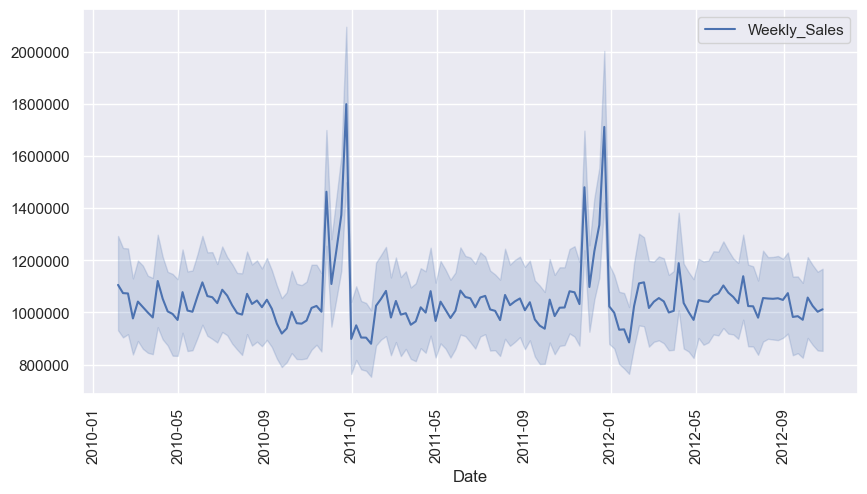

In [351]:
#plotting line plot of seasonal_trend

plt.figure(figsize=(10,5))
sns.lineplot(seasonal_trend)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f')) #format the y-axis tick labels as integers without decimal places.
plt.show()


*An observable trend emerges from the above graph, highlighting a seasonal pattern at year's end, notably in the months of December, where a distinct spike in sales figures become evident. Increased sales in the month of December can be attributed to sevaral factors related to consumer behaviour and retail dynamics during this time:*
***
+ **Holiday Season:** December includes various holidays like Christmas and New Year's eve. During this festive period,consumer spending typically inreases significantly as  as people purchase gifts, decorations,food and other holiday related items.

+ **Promotions & Sales:** Retailers often offer special promotions, discounts and sales evets during the holiday season to attract shoppers.This can lead to high sales volumes as consumers takes advantage of these offers.

+ **Seasonal Demand:** Certain products or categories experience high demand during the holiday season. For instance, winter clothing, electronics, toys and holiday themed items tend to sell more during this time.

In [352]:
#Creating a dataframe of December Sales figures of each store by date to see the weekly sales figures.

pd.set_option('display.max_rows',None)
dates_dec=walmart[walmart["Date"].dt.month==12]
dates_dec=dates_dec[dates_dec['Date'].dt.year.isin([2010,2011,2012])].iloc[:,0:3]
dates_dec.head(10)

,Store,Date,Weekly_Sales
43,1,2010-12-03,1548033.78
44,1,2010-12-10,1682614.26
45,1,2010-12-17,1891034.93
46,1,2010-12-24,2387950.20
47,1,2010-12-31,1367320.01
95,1,2011-12-02,1584083.95
96,1,2011-12-09,1799682.38
97,1,2011-12-16,1881176.67
98,1,2011-12-23,2270188.99
99,1,2011-12-30,1497462.72


>**c. Does temperature affect the weekly sales in any manner?**


In [353]:
#Checking the overall correlation between weekly sales and temperature column. 

walmart[["Weekly_Sales","Temperature"]].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00,-0.06
Temperature,-0.06,1.00


In [354]:
#Checking store wise correlation between weekly sales and temperature column.

temp_corr=walmart.groupby("Store")[["Weekly_Sales","Temperature"]].corr().iloc[0::2,1]
temp_corr=pd.DataFrame(temp_corr)
temp_corr.head()

,,Temperature
Store,,
1,Weekly_Sales,-0.22
2,Weekly_Sales,-0.30
3,Weekly_Sales,-0.38
4,Weekly_Sales,-0.23
5,Weekly_Sales,-0.18


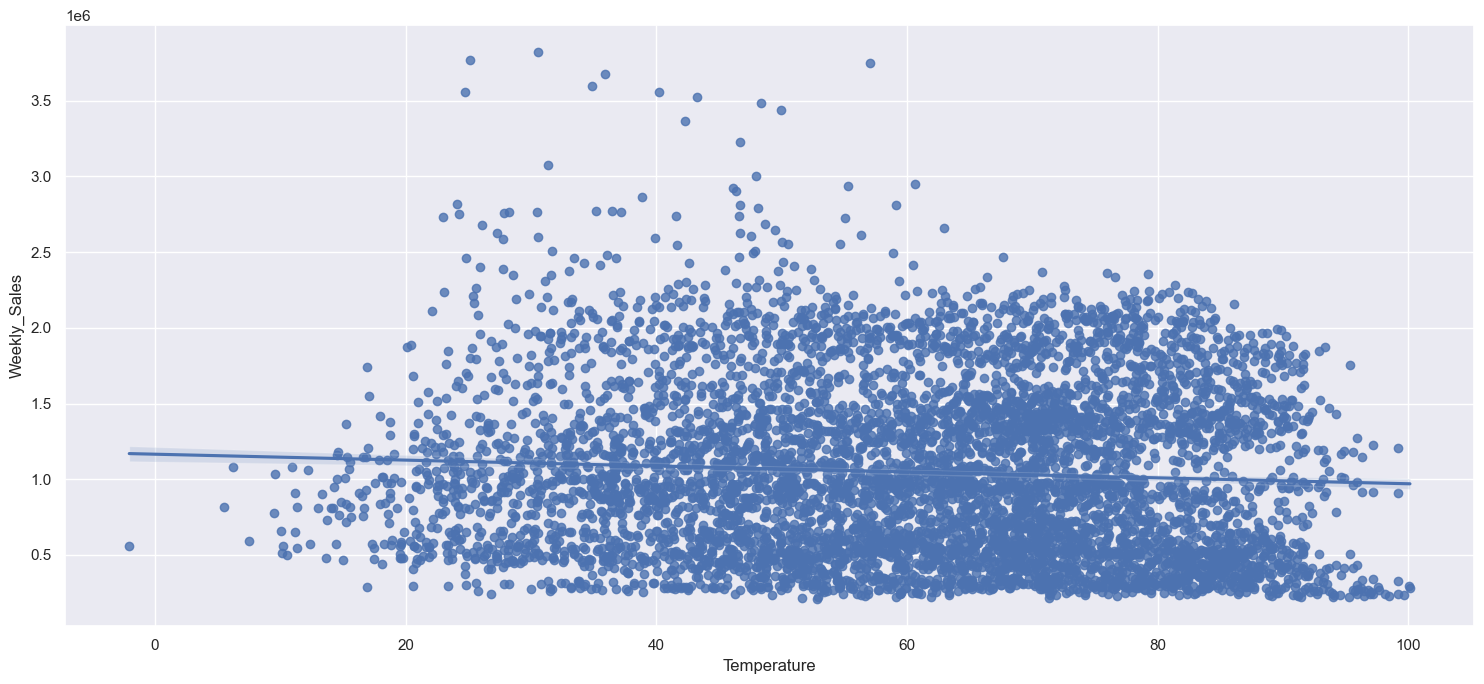

In [355]:
plt.figure(figsize=(15,7))
sns.regplot(x=walmart["Temperature"],y=walmart["Weekly_Sales"],data=walmart)
plt.tight_layout()
plt.show()

*From the above analysis and graphical representation, we can say that there is very weak correlation between weekly sales and temperature. Hence, we can say that temperature is not affecting much  the weekly sales of a store.*

>**d. How is the Consumer Price index affecting the weekly sales of various stores?**


In [356]:
#Checking the overall correlation between consumer price index and weekly sales.
walmart[['Weekly_Sales','CPI']].corr()

,Weekly_Sales,CPI
Weekly_Sales,1.00,-0.07
CPI,-0.07,1.00


In [357]:
#Checking store wise correlation between CPI and Weekly Sales.

cpi_corr=walmart.groupby('Store')[['Weekly_Sales','CPI']].corr().iloc[::2,1]
cpi_corr=pd.DataFrame(cpi_corr)
cpi_corr.head()

,,CPI
Store,,
1,Weekly_Sales,0.23
2,Weekly_Sales,-0.06
3,Weekly_Sales,0.32
4,Weekly_Sales,0.35
5,Weekly_Sales,0.31


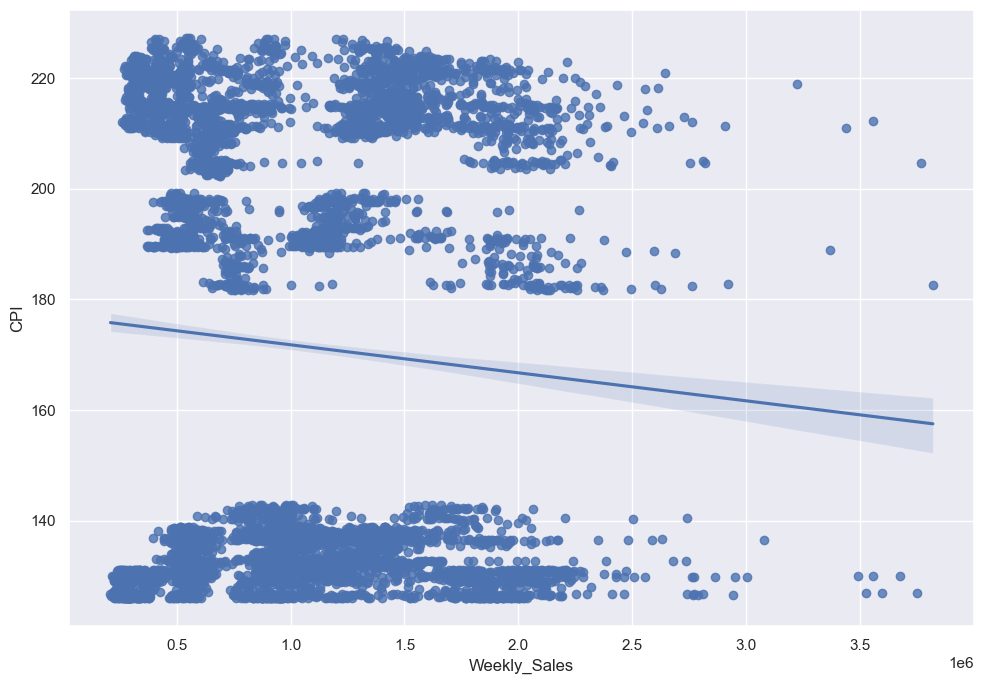

In [358]:
plt.figure(figsize=(10,7))
sns.regplot(x=walmart.Weekly_Sales,y=walmart.CPI,data=walmart)
plt.tight_layout()
plt.show()

*From the above graph we can see that, there is a negative correlation between Weekly Sales & CPI, which indicates that the weekly sales of some stores are affected by the rise in consumer price index.*

In [359]:
#Selecting the stores whose weekly sales are affected by the rise in consumer price index.
cpi_affected_stores=cpi_corr[cpi_corr['CPI'] <= -0.6]
cpi_affected_stores

,,CPI
Store,,
36,Weekly_Sales,-0.92


*Among all the stores that are affected by the consumer price index, the most affected store is store number 36.*

In [360]:
store_36=walmart[walmart['Store']==36]

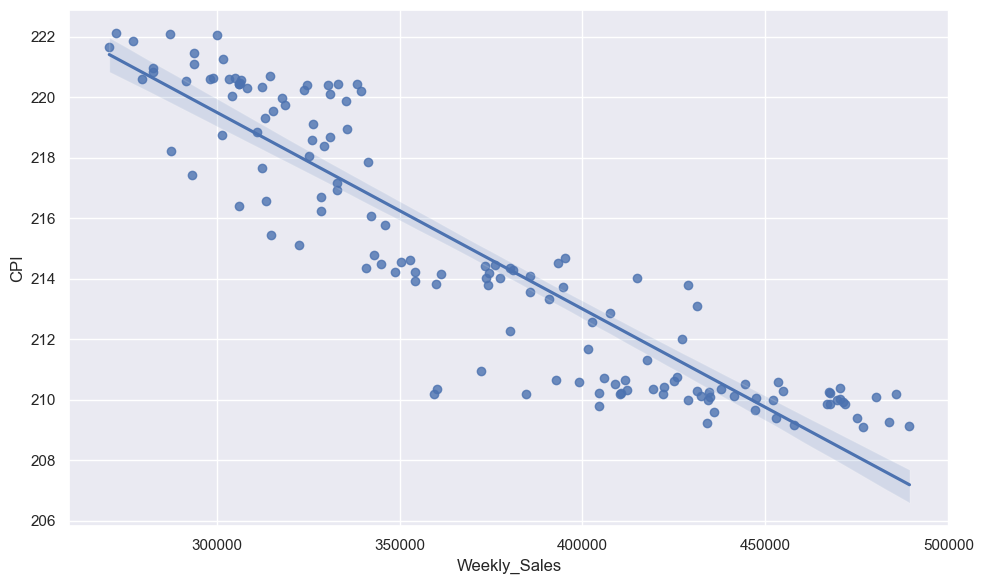

In [361]:
#Plotting a graph to understand the impact of consumer price index on weekly sales of store number 36.
sns.regplot(x=store_36["Weekly_Sales"],y=store_36['CPI'],data=store_36)
plt.tight_layout()
plt.show()

>**e. Top performing stores according to the historical data.**

In [362]:
#Creating a new column with the name 'Year' to analyze the performers according to the historical data.

walmart['Year']=walmart['Date'].dt.year
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2010
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,2010


In [363]:
#Using groupby and sum function to derive all the store's sales value according to year.

performers=walmart.groupby(['Year','Store'])['Weekly_Sales'].sum().sort_values(ascending = False).reset_index()
performers=pd.DataFrame(performers)
performers.head()

,Year,Store,Weekly_Sales
0,2011,4,111092293.33
1,2011,20,109837002.36
2,2011,14,106096270.70
3,2010,14,105462242.38
4,2011,13,104537513.33


In [364]:
#Selecting the top performing store for each year.
top_performers=pd.DataFrame()
years=np.unique(walmart['Year'])
for year in years:
          filter_condition=performers[performers['Year']==year]
          max_sale=filter_condition['Weekly_Sales'].max()
          best_store=performers[performers['Weekly_Sales']==max_sale]
          top_performers=pd.concat([top_performers,best_store])

top_performers=top_performers.reset_index(drop=True)
top_performers

,Year,Store,Weekly_Sales
0,2010,14,105462242.38
1,2011,4,111092293.33
2,2012,4,92771189.24


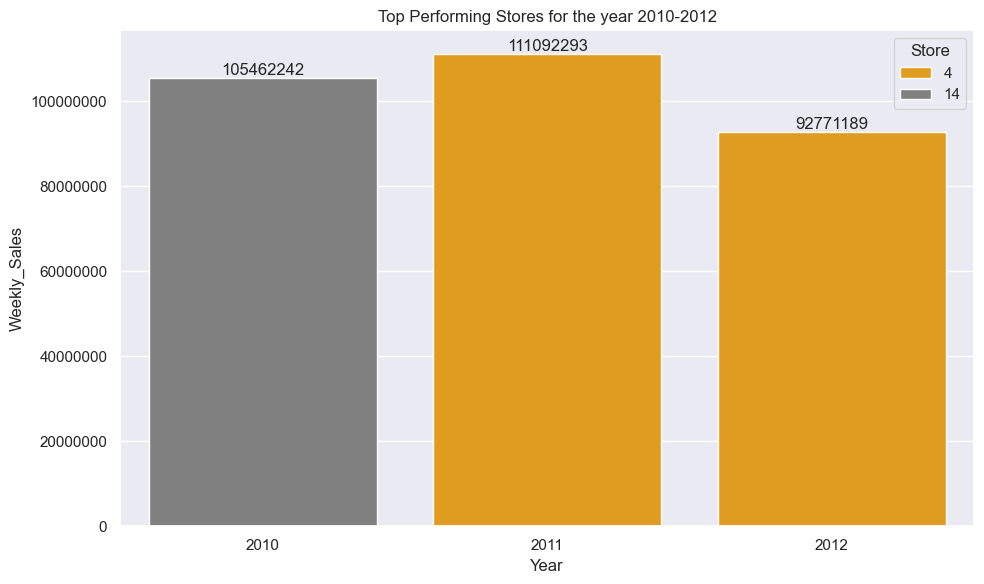

In [365]:
#Plotting a bar plot to visualize the best performing store for each year.

sns.set(rc={'figure.figsize':(10,6)})
custom_palette=['orange','grey']
ax=sns.barplot(x=top_performers['Year'],y=top_performers['Weekly_Sales'],data=top_performers,hue='Store',palette=custom_palette)

for bars in ax.containers:
          ax.bar_label(bars,fmt='%d',label_type='edge')

plt.ticklabel_format(style='plain',axis='y')
plt.title("Top Performing Stores for the year 2010-2012")
plt.tight_layout()
plt.show()

*Based on the above graphical representation, it is evident that in the year 2010, Store 14 emerged as the top performer, while in the subsequent years, 2011 and 2012, Store 4 exhibited the highest level of performance. This observation underscores the dynamic nature  of store performance across different years within the analyzed dataset.*

>**f. The worst performing store.**


In [366]:
#Selecting the worst performing stores across different years.

worst_performers=pd.DataFrame()

for year in years:
          filter_condition=performers[performers["Year"]==year]
          min_sale=filter_condition["Weekly_Sales"].min()
          worst_store=performers[performers['Weekly_Sales']==min_sale]
          worst_performers=pd.concat([worst_performers,worst_store])


worst_performers=worst_performers.reset_index(drop=True)
worst_performers

,Year,Store,Weekly_Sales
0,2010,33,12766834.26
1,2011,33,12957836.67
2,2012,33,11435551.03


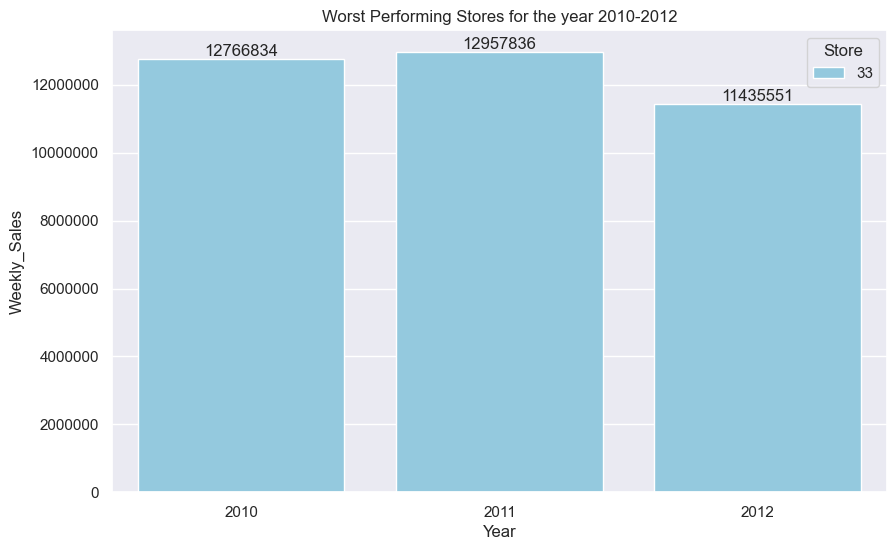

In [367]:
sns.set(rc={'figure.figsize':(10,6)})
ax=sns.barplot(x=worst_performers['Year'],y=worst_performers['Weekly_Sales'],data=worst_performers,hue='Store',palette=['skyblue'])

for bars in ax.containers:
          ax.bar_label(bars,fmt='%d',label_type='edge')

plt.ticklabel_format(style='plain',axis='y')
plt.title("Worst Performing Stores for the year 2010-2012")
plt.show()

*From the above graph, it is visible that Store 33 is the worst performing store across the years.*

>**How significant is the difference between the
highest and lowest performing stores?**

In [368]:
# Performing T-Test to find out the significant difference.
from scipy.stats import ttest_ind

In [369]:
best_sales=top_performers['Weekly_Sales']
worst_sales=worst_performers['Weekly_Sales']


In [370]:
# Perform independent sample t-test.
t_statistics,p_value=ttest_ind(best_sales,worst_sales)

In [371]:
print('Independent Samples t_test Statistics: ',t_statistics)
print('P-value: ',p_value)

Independent Samples t_test Statistics:  16.678929098312505
P-value:  7.570802099676574e-05


In [372]:
alpha=0.05 #setting the level of significance.

if p_value<alpha:
          print("\nThe difference between the best and worst performing stores is statistically significant")

else:
          print("\nThe difference between the best and worst performing stores is not statistically significant")


The difference between the best and worst performing stores is statistically significant


*Null Hypothesis: The mean weekly sales of the best-performing stores are equal to the mean weekly sales of the worst-performing stores.*

*Alternative Hypothesis: The mean weekly sales of the best-performing stores are not equal to the mean weekly sales of the worst-performing stores.*

*Since, the p-value is lesser than the level of significance, we are rejecting the null hypothesis.*



>**2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks**

In [373]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2010
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,2010


In [374]:
# Taking the weekly sales of store 14 for forecatsing.
walmart=walmart[walmart["Store"]==14]
walmart_store_14=walmart.copy()
walmart=walmart.iloc[:,[1,2]]
walmart['Date']=pd.to_datetime(walmart['Date'])
walmart=walmart.set_index(['Date'])
walmart.head(20)

,Weekly_Sales
Date,
2010-02-05,2623469.95
2010-02-12,1704218.84
2010-02-19,2204556.70
2010-02-26,2095591.63
2010-03-05,2237544.75
2010-03-12,2156035.06
2010-03-19,2066219.30
2010-03-26,2050396.27
2010-04-02,2495630.51


DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26

In [375]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [376]:
walmart.shape

(143, 1)

## *****Data Preprocessing and Model Building using SARIMAX(Seasonal Auto Regressive Integrated Moving Average eXogenous*****)

*****Checking for data stationarity.***** 

<Axes: xlabel='Date'>

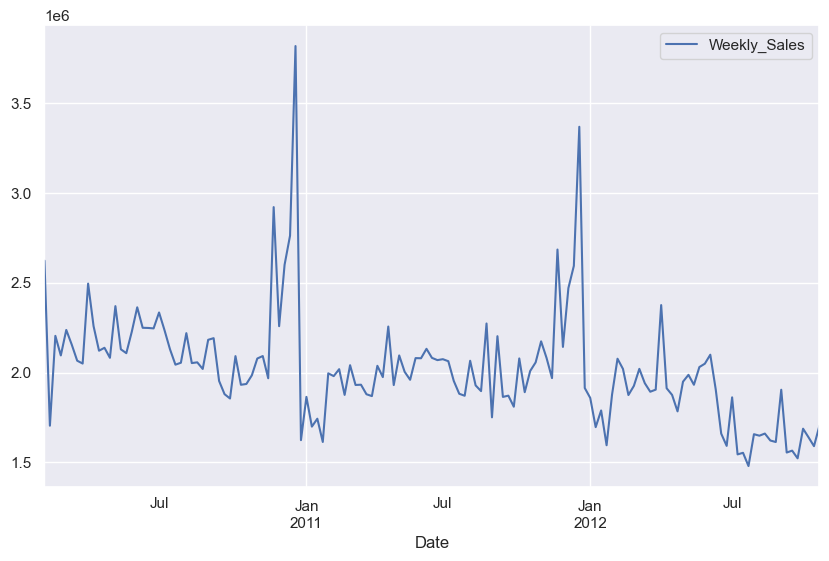

In [377]:
# Plotting the Time series
walmart.plot()

*****AD Fuller Test*****

In [378]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(walmart)

print(f'ADF Statistic= {result[0]}')
print(f'p-value= {result[1]}')
print(f'n_lags= {result[2]}')

if (result[1] > 0.05):
          print('The series is not stationary')
else:
        print('The series is stationary')

ADF Statistic= -2.7368866106752003
p-value= 0.06786986708375087
n_lags= 6
The series is not stationary


*****Rolling Stats*****

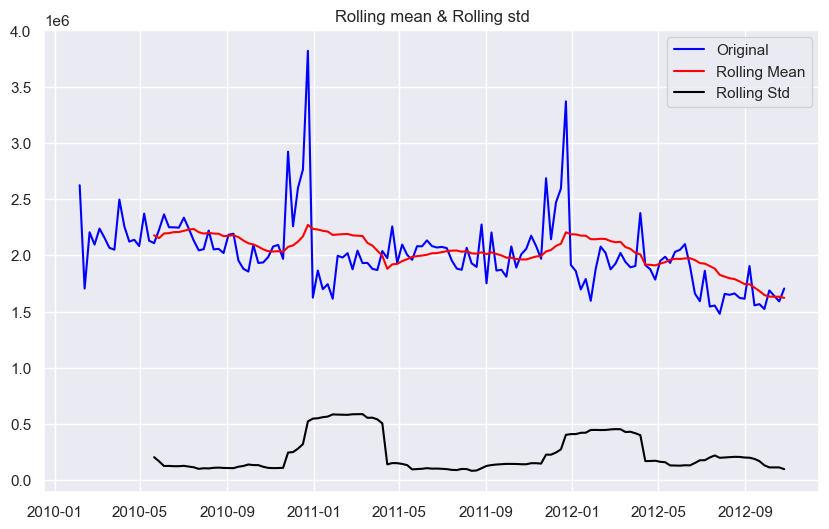

In [379]:
mean_log=walmart.rolling(window=16).mean()
std_log=walmart.rolling(window=16).std()

#Lets plot the rolling mean and rolling std deviation

plt.plot(walmart,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling mean & Rolling std")
plt.show()

*From the above graph we can see that the data is not stationary.*

*****Making the data stationary:*****

<Axes: xlabel='Date'>

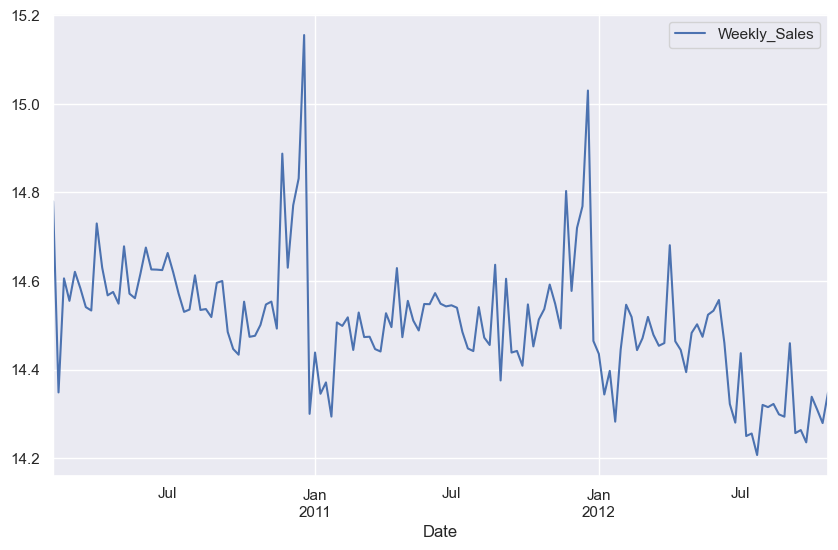

In [380]:
#Logarithmic computation to make the data stationary.

first_log=np.log(walmart)
first_log=first_log.dropna()
first_log.plot()

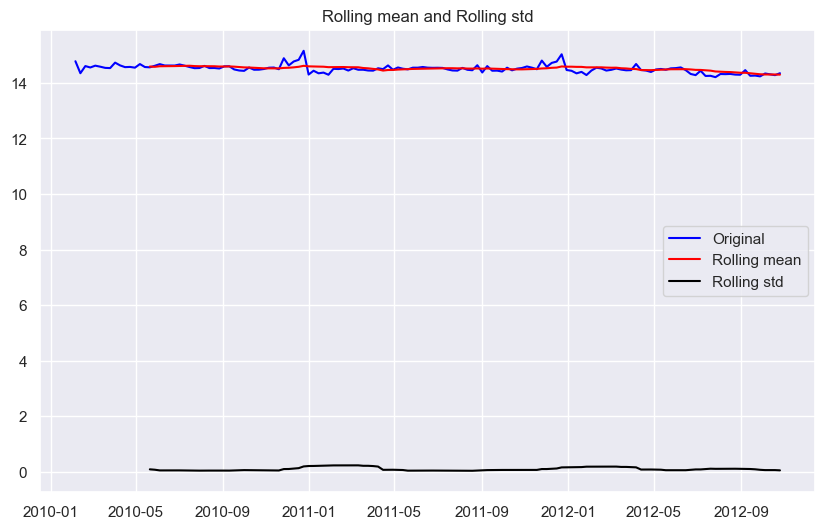

In [381]:
#Computing the rolling mean of the dataframe 'first_log' using a window size of 16 and storing it in new valriable named 'mean_log_new'.

mean_log_new=first_log.rolling(window=16).mean()
std_log=first_log.rolling(window=16).std()

plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log_new,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std')
plt.show()

In [382]:
# Creating a new DataFrame called 'walmart_new' by subtracting the rolling mean ('mean_log_new') from the log transformed ('first_log')
walmart_new=first_log-mean_log_new
walmart_new=walmart_new.dropna()
walmart_new.head()

,Weekly_Sales
Date,
2010-05-21,-0.03
2010-05-28,0.04
2010-06-04,0.08
2010-06-11,0.03
2010-06-18,0.02


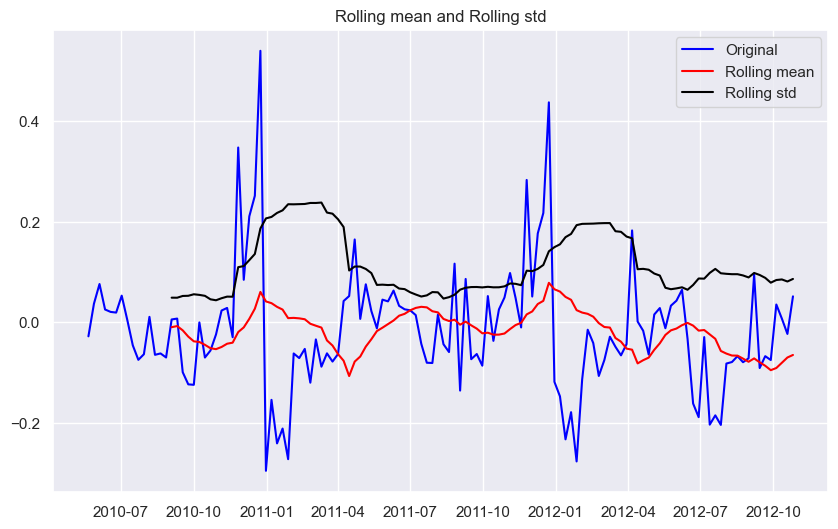

In [383]:
mean_log=walmart_new.rolling(window=16).mean()
std_log=walmart_new.rolling(window=16).std()

plt.plot(walmart_new,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std')
plt.show()

In [384]:
result=adfuller(walmart_new)

print(f'ADF Statistic= {result[0]}')
print(f'p-value= {result[1]}')
print(f'n_lags= {result[2]}')

if (result[1] > 0.05):
          print('The series is not stationary')
else:
        print('The series is stationary')

ADF Statistic= -5.385126478065249
p-value= 3.639562165162873e-06
n_lags= 4
The series is stationary


*****Now that the data is stationary we will check for seasonality*****

In [385]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decompose_result=seasonal_decompose(walmart_new['Weekly_Sales'].dropna(),period=26)
# plt.figure(figsize=(10, 6))

# plt.subplot(4, 1, 1)
# plt.plot(decompose_result.observed, label='Observed')
# plt.legend()

# plt.subplot(4, 1, 2)
# plt.plot(decompose_result.trend, label='Trend')
# plt.legend()

# plt.subplot(4, 1, 3)
# plt.plot(decompose_result.seasonal, label='Seasonal')
# plt.legend()

# plt.subplot(4, 1, 4)
# plt.plot(decompose_result.resid, label='Residual')
# plt.legend()

# plt.tight_layout()
# plt.show()

Text(0.5, 1.0, 'Walmart')

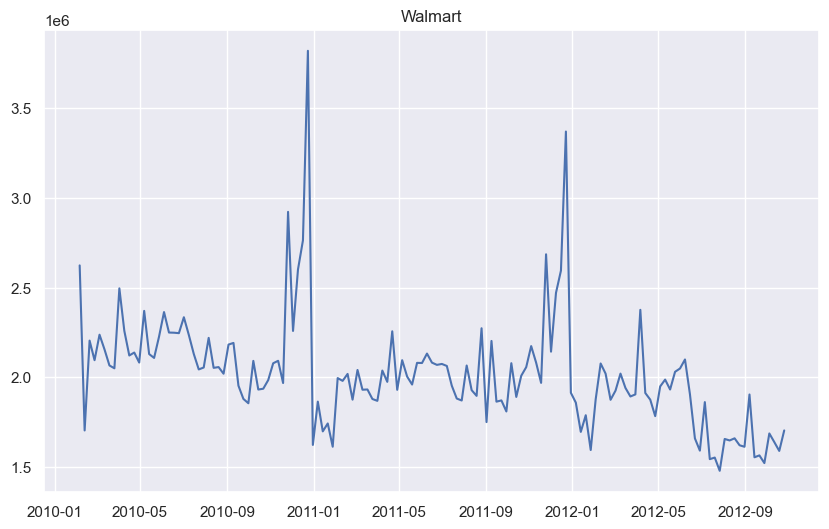

In [386]:
#Before making it stationary.
plt.plot(walmart)
plt.title('Walmart')


Text(0.5, 1.0, 'Walmart_new')

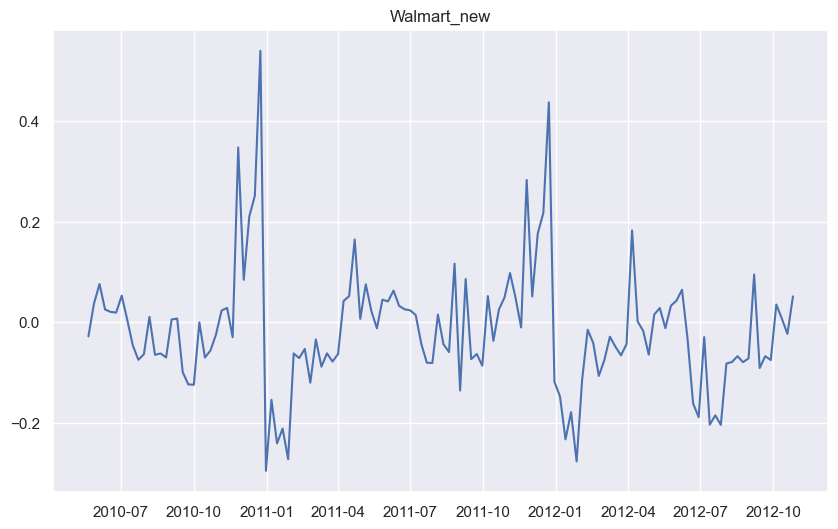

In [387]:
#After making it stationary.
plt.plot(walmart_new)
plt.title('Walmart_new')


*****Model Building:*****

In [388]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

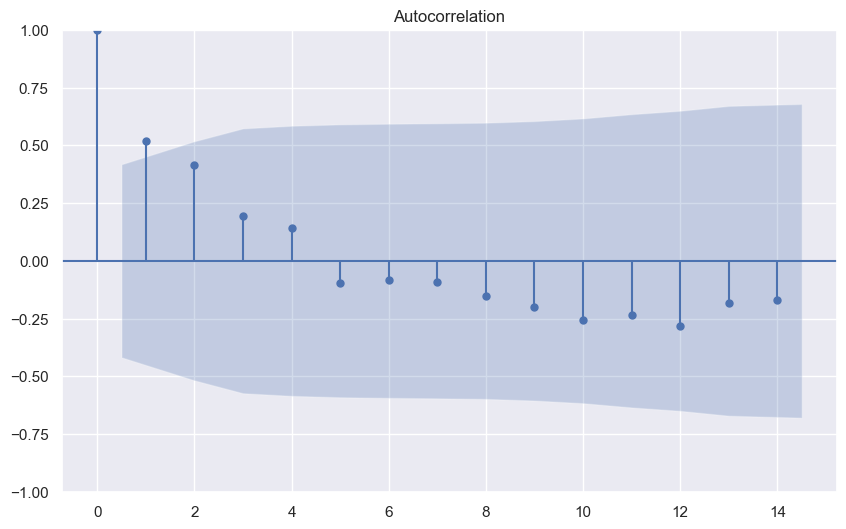

In [389]:
acf_plot=acf(walmart_new.dropna()) #q
plot_acf(acf_plot);

+ ACF (AutoCorrelation Function):

  + The ACF measures the correlation between a time series and its lagged values.
  + The lag at which the ACF becomes close to zero indicates the order of the MA (moving average) model. If there is a   significant spike at lag "q," it suggests that there is a correlation between the time series and its values "q" time periods ago.
  + Therefore, "q" is the order of the moving average (MA) component.

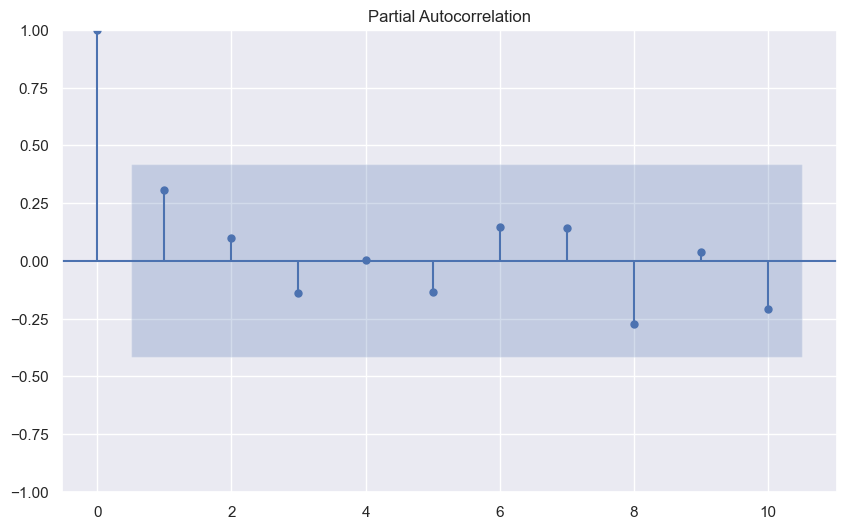

In [390]:
pacf_plot=pacf(walmart_new.dropna()) #p
plot_pacf(pacf_plot,lags=10)
plt.show()

+ ACF (Partial AutoCorrelation Function):

   + The PACF measures the correlation between a time series and its lagged values after removing the effects of shorter lags.
   + The lag at which the PACF becomes close to zero indicates the order of the AR (autoregressive) model. If there is a significant spike at lag "p," it suggests that there is a correlation between the time series and its values "p" time periods ago, after removing the effects of shorter lags.
   + Therefore, "p" is the order of the autoregressive (AR) component.

In [391]:
#Checking the shape of the data.
walmart_new.shape

(128, 1)

In [392]:
#Splitting the stationary data into training and testing.
train=walmart_new.iloc[:120] #assigning first 120 rows for training.
test=walmart_new.iloc[120:]  #assigning remaining 8 rows for testing.

In [393]:
# # Importing the Model.
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Training the model using SARIMAX:
# model=SARIMAX(train,order=(3,0,5),seasonal_order=(3,0,4,52)) 
# model=model.fit()

In [394]:
# #Making prediction on the test data.
# walmart_new['Predict_test']=model.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
# walmart_new[['Weekly_Sales','Predict_test']].plot()

*****Evaluating the Model's Performance.*****

In [395]:
# from sklearn.metrics import mean_squared_error
# error=np.sqrt(mean_squared_error(test,walmart_new['Predict_test'].dropna()))
# print('RMSE: ',error)

*****Forecasting for the next 12 weeks:*****

In [396]:
# forecast=model.forecast(steps=12)
# walmart_new.plot()
# forecast.plot()

*****Forecasting for the next 52 weeks:*****

In [397]:
# forecast=model.forecast(steps=52)
# walmart_new.plot()
# forecast.plot()

In [398]:
# forecast=pd.DataFrame(forecast)
# forecast.tail(10)

In [399]:

# #Filling all the NaN values with 0.
# walmart_new['Predict_test']=walmart_new['Predict_test'].fillna(0)

In [400]:
# # Reversing all the log transformed values to my original values.
# mean_log_new.dropna(inplace=True)

# walmart_new['Weekly_Sales']=walmart_new['Weekly_Sales']+mean_log_new['Weekly_Sales'] # adding back the mean_log values values back to weekly sales which we have substracted earlier.

# walmart_new['Predict_test']=walmart_new['Predict_test']+mean_log_ew['Weekly_Sales'].iloc[-8:] # adding back the mean log values of last 8 rows  as we are predicting the last 8 rows of the weekly sales.

# walmart_new=np.exp(walmart_new) # Reversing the values to its original form using numpy exponential function.

# walmart_new.tail(20) # Checking the last 20 rows of data.

## Model Building using FB Prophet

In [401]:
# from prophet import Prophet

In [402]:
# walmart.reset_index(inplace=True)
# walmart.head()

In [403]:
# # Renaming the "Date" Column to 'ds' & target column to 'y' because FB prophet works with only these column names.
# walmart.columns=['ds','y']

# print(walmart.info())
# walmart.tail()

In [404]:
# train=walmart.iloc[:135]
# test=walmart.iloc[135:]

In [405]:
# test

In [406]:
# model=Prophet(interval_width=0.95) 
# #interval_width: This parameter sets the width of the uncertainty intervals in the forecast. The uncertainty intervals represent the range within which the actual values are likely to fall. In this case, interval_width=0.95 means the model will provide prediction intervals that cover 80% of the predicted values, implying a higher level of confidence in the forecast.

# #Fitting the model on store data.
# model.fit(train)


interval_width: This parameter sets the width of the uncertainty intervals in the forecast. The uncertainty intervals represent the range within which the actual values are likely to fall. In this case, interval_width=0.80 means the model will provide prediction intervals that cover 80% of the predicted values, implying a higher level of confidence in the forecast.

In [407]:
# # Generates future dates for prediction.

# future=model.make_future_dataframe(periods=12,freq='W') 


In [408]:
# model.component_modes

*****Forecasting for the next 12 weeks:*****

In [409]:
# # Make Predictions for the future dates.
# forecast=model.predict(future)
# forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

* Column yhat contains the forecasted values.
* Columns yhat_lower contains the lower limit of the forecasted values.
* Column yhat_upper contains the upper limit of the forecasted values.

*****Visualising the actual and forecasted data.*****

In [410]:
# model.plot(forecast)
# plt.legend()
# plt.show()

* Black dots are representing actual data points.
* Blue line is representing forecasted data.
* Light blue shaded area is representing upper limit and lower limit of the forecasted data.


*****Using Built-In FB Prophet Visualisation tools.*****

In [411]:
# from prophet.plot import plot_plotly,plot_components_plotly

# plot_plotly(model,forecast)


In [412]:
# plot_components_plotly(model,forecast)

In [413]:
# from statsmodels.tools.eval_measures import rmse

In [414]:
# predictions=forecast.loc[135:142]['yhat']
# pd.DataFrame(predictions)

In [415]:
# test['y']

In [416]:
# from sklearn.metrics import mean_squared_error

In [417]:
# print("Root mean squared error between actual and predicted: ",np.sqrt(mean_squared_error(test['y'],predictions)))

## Model building using Deep Learining model LSTM(Long Short Term Memory).

In [418]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [419]:
walmart_store_14.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
1859,14,2010-02-05,2623469.95,0,27.31,2.78,181.87,8.99,2010
1860,14,2010-02-12,1704218.84,1,27.73,2.77,181.98,8.99,2010
1861,14,2010-02-19,2204556.70,0,31.27,2.75,182.03,8.99,2010
1862,14,2010-02-26,2095591.63,0,34.89,2.75,182.08,8.99,2010
1863,14,2010-03-05,2237544.75,0,37.13,2.78,182.12,8.99,2010


In [420]:
walmart_store_14.shape

(143, 9)

In [421]:
walmart_store_14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 1859 to 2001
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   Year          143 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 10.6 KB


In [422]:
walmart=walmart_store_14.iloc[:,[1,2]]

In [423]:
train=walmart[:-12]
test=walmart[-12:]

In [424]:
train.shape

(131, 2)

In [425]:
train.tail()

,Date,Weekly_Sales
1985,2012-07-06,1862128.95
1986,2012-07-13,1544422.35
1987,2012-07-20,1553250.16
1988,2012-07-27,1479514.66
1989,2012-08-03,1656886.46


In [426]:
test

,Date,Weekly_Sales
1990,2012-08-10,1648570.03
1991,2012-08-17,1660433.30
1992,2012-08-24,1621841.33
1993,2012-08-31,1613342.19
1994,2012-09-07,1904512.34
1995,2012-09-14,1554794.22
1996,2012-09-21,1565352.46
1997,2012-09-28,1522512.20
1998,2012-10-05,1687592.16
1999,2012-10-12,1639585.61


In [427]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1859 to 1989
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          131 non-null    datetime64[ns]
 1   Weekly_Sales  131 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


In [428]:
train[['Weekly_Sales']].head()

,Weekly_Sales
1859,2623469.95
1860,1704218.84
1861,2204556.70
1862,2095591.63
1863,2237544.75


In [429]:
from sklearn.preprocessing import MinMaxScaler

In [430]:
#Normalize the data.
scaler=MinMaxScaler()
scaled=scaler.fit_transform(train['Weekly_Sales'].values.reshape(-1,1))


In [431]:
scaled_test=scaler.transform(test['Weekly_Sales'].values.reshape(-1,1))

In [432]:
len(scaled)

131

In [433]:
#Prepare Data for lstm
X=[]
Y=[]

for i in range(12,len(scaled)):
          X.append(scaled[i-12:i,0])
          Y.append(scaled[i,0])

X,Y=np.array(X),np.array(Y)
X=np.reshape(X,(X.shape[0],X.shape[1],1))

In [434]:
X.shape

(119, 12, 1)

In [435]:
#Build the LSTM model.

model=Sequential()

model.add(LSTM(units=50,activation='relu',input_shape=(X.shape[1],1)))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse')
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [436]:
model.fit(X,Y,epochs=100,batch_size=32)


Epoch 1/100
4/4 [==============================] - 5s 13ms/step - loss: 0.0807
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0635
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0500
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0387
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0294
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0181
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0172
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0163
Epoch 12/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0163
Epoch 13/100
4/4 [==============================]

In [437]:
scaled_test.shape

(12, 1)

In [438]:
np.reshape(scaled_test,(1,12,1)).shape

(1, 12, 1)

In [439]:
forecast=[]
inputs=scaled_test
for i in range(12):
          X_forecast=np.reshape(inputs,(1,12,1))
          y_pred=model.predict(X_forecast)
          forecast.append(y_pred[0])
          inputs=np.append(inputs,y_pred)
          inputs=inputs[1:]

forecast_values=scaler.inverse_transform(np.array(forecast).reshape(-1,1))
forecast_values

1/1 [==============================] - 0s 71ms/step


array([[1740293.4],
       [1764197.8],
       [1788042.2],
       [1812005.6],
       [1835486.8],
       [1857471.5],
       [1877058.1],
       [1894990.6],
       [1911135.8],
       [1926417.9],
       [1939873.4],
       [1951953.6]], dtype=float32)

In [440]:
test['Forecast']=forecast_values

In [441]:
test

,Date,Weekly_Sales,Forecast
1990,2012-08-10,1648570.03,1740293.38
1991,2012-08-17,1660433.30,1764197.75
1992,2012-08-24,1621841.33,1788042.25
1993,2012-08-31,1613342.19,1812005.62
1994,2012-09-07,1904512.34,1835486.75
1995,2012-09-14,1554794.22,1857471.50
1996,2012-09-21,1565352.46,1877058.12
1997,2012-09-28,1522512.20,1894990.62
1998,2012-10-05,1687592.16,1911135.75
1999,2012-10-12,1639585.61,1926417.88


<Axes: >

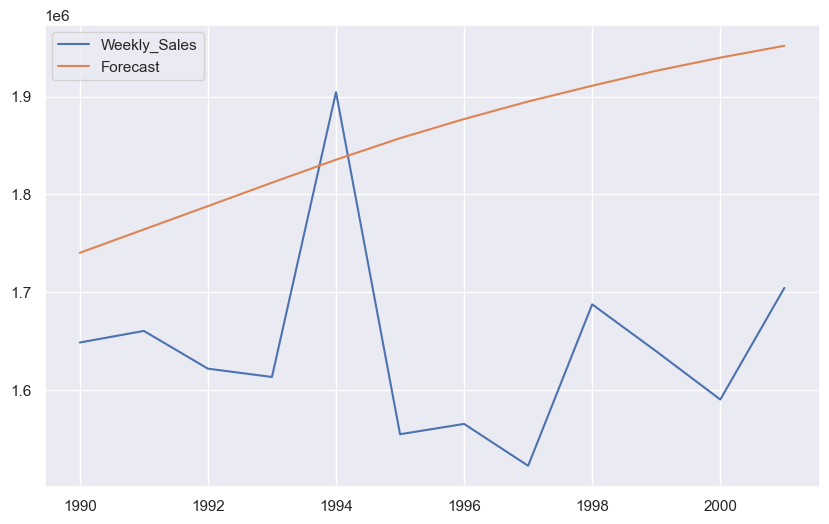

In [442]:
test[['Weekly_Sales','Forecast']].plot()

In [443]:
from sklearn.metrics import mean_squared_error

In [444]:
print("RMSE: ",np.sqrt(mean_squared_error(test['Weekly_Sales'],test['Forecast'])))

RMSE:  247372.23841277204
